# App_reviews scraper and basic analysis

- fetch reviews of an application from app store 
- create a dataframe of the latest 1000 max reviews
- apply basic sentiment analysis with nltk

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np

# libraries for the scraper
from app_store_scraper import AppStore


In [3]:
# get the app_name and app_id as in the URL (https://apps.apple.com/us/app/'splitwise'/id'458023433')
app_name = "splitwise"
app_id = "458023433"

In [4]:
# fetch the reviews from the app store
app = AppStore(country='in', app_name=app_name, app_id = app_id)
app.review(how_many=3000)
app_reviews = app.reviews

2022-09-11 08:11:04,774 [INFO] Base - Initialised: AppStore('in', 'splitwise', 458023433)
2022-09-11 08:11:04,775 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/in/app/splitwise/id458023433
2022-09-11 08:11:09,809 [INFO] Base - [id:458023433] Fetched 100 reviews (100 fetched in total)
2022-09-11 08:11:16,559 [INFO] Base - [id:458023433] Fetched 240 reviews (240 fetched in total)
2022-09-11 08:11:23,285 [INFO] Base - [id:458023433] Fetched 380 reviews (380 fetched in total)
2022-09-11 08:11:29,803 [INFO] Base - [id:458023433] Fetched 520 reviews (520 fetched in total)
2022-09-11 08:11:35,809 [INFO] Base - [id:458023433] Fetched 640 reviews (640 fetched in total)
2022-09-11 08:11:42,359 [INFO] Base - [id:458023433] Fetched 780 reviews (780 fetched in total)
2022-09-11 08:11:48,464 [INFO] Base - [id:458023433] Fetched 900 reviews (900 fetched in total)
2022-09-11 08:11:55,344 [INFO] Base - [id:458023433] Fetched 1040 reviews (1040 fetched in total)
2022-09-11 08:12:01,7

In [5]:
# create the data frame for the reviews
app_reviews_df = pd.DataFrame(np.array(app_reviews),columns=['review'])
app_reviews_df = app_reviews_df.join(pd.DataFrame(app_reviews_df.pop('review').tolist()))


In [6]:
# create a list of the latest 1000 reviews
app_reviews_df = app_reviews_df.sort_values(by=['date'],ascending=False).head(1000)

In [7]:
# save the data in a csv file
app_reviews_df.to_csv(f'app_store Reviews of {app_name}.csv')

### Next is the Basic Sentiment Analysis using nltk 

In [8]:
# Importing the libraries
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Binba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# Creating a new column 'Compound' which contains the polarity scores
app_reviews_df['Compound'] = app_reviews_df['review'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [10]:
# Creating a new column 'Sentiment' which classifies the polarity scores
app_reviews_df['Sentiment'] = app_reviews_df['Compound'].apply(lambda x: 'Positive' if x >=0 else 'Negative')

In [11]:
# Printing the first 10 rows of the data
print(app_reviews_df.head(10))

# Printing the percentage of positive and negative reviews
print(app_reviews_df['Sentiment'].value_counts(normalize=True) * 100)

                                             title  rating  \
461                                        6 years       5   
201                   Simple easy and does the job       5   
189                                      Excellent       5   
157                                Simply the BEST       5   
224  Unable to change amount after adding in group       1   
385                                Very convenient       5   
462                              Thanks super app…       5   
739                                       Good app       5   
672                     Showing incorrect Balances       1   
146                                       Best app       5   

                                                review          userName  \
461                                       And counting     Chandan_Anand   
201                                          Perfectly    Ab14049@iphone   
189  App simplifies the group spending and keeps th...      Sangameshwar   
157  Never th

<AxesSubplot:>

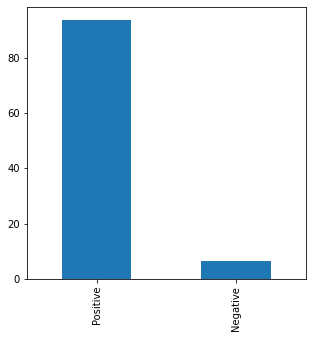

In [14]:
# plot the results of negative and posative reviews
x  = app_reviews_df['Sentiment'].value_counts(normalize=True) * 100

x.plot(kind='bar',figsize=(5,5))

<AxesSubplot:>

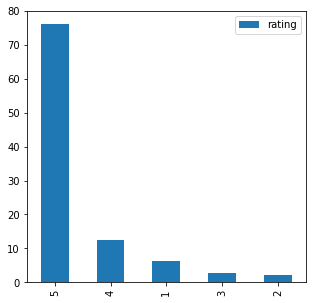

In [21]:
# plot the persentage of stars rating of the app
y = app_reviews_df['rating'].value_counts(normalize=True) * 100
y.to_frame().plot(kind='bar',figsize=(5,5))

In [12]:
# export the dataframe of results to a csv file
app_reviews_df.to_csv(f'app_store Review {app_name} with Sentiment.csv')